<a href="https://colab.research.google.com/github/susatos9/lantai5dike/blob/main/MLP_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Memuat data pada notebook
import pandas as pd

data = pd.read_csv("train.csv")

<div align="center">
    <img src="https://ppcexpo.com/blog/wp-content/uploads/2022/01/exploratory-data-analysis.jpg" width="700" height="400"/>
</div>

## Analisa Data Secara Keseluruhan (EDA)


### Visualisasi dan Memahami Data

In [24]:
#data.shape()


In [25]:
# Prints the first 5 rows of the dataframe
data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [34]:
# Prints the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Columns: 2078 entries, id to supported
dtypes: bool(2072), category(2), int64(4)
memory usage: 378.7 MB


In [27]:
# prompt: can you count the missing data in each column

import pandas as pd
missing_counts = data.isnull().sum()

print("Missing Data Count per Column:")
print(missing_counts)

Missing Data Count per Column:
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64


In [28]:
# prompt: Can you list the unique column for column with object type

for column in data.columns:
    if data[column].dtype == object:
        unique_values = data[column].unique()
        print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'brand': ['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Tesla' 'Cadillac' 'Land' 'GMC' 'Toyota' 'Hyundai' 'Volvo'
 'Volkswagen' 'Buick' 'Rivian' 'RAM' 'Hummer' 'Alfa' 'INFINITI' 'Jeep'
 'Porsche' 'McLaren' 'Honda' 'Lexus' 'Dodge' 'Nissan' 'Jaguar' 'Acura'
 'Kia' 'Mitsubishi' 'Rolls-Royce' 'Maserati' 'Pontiac' 'Saturn' 'Bentley'
 'Mazda' 'Subaru' 'Ferrari' 'Aston' 'Lamborghini' 'Chrysler' 'Lucid'
 'Lotus' 'Scion' 'smart' 'Karma' 'Plymouth' 'Suzuki' 'FIAT' 'Saab'
 'Bugatti' 'Mercury' 'Polestar' 'Maybach']
Unique values for column 'model': ['Cooper S Base' 'LS V8' 'Silverado 2500 LT' ... 'e-Golf SE'
 'Integra w/A-Spec Tech Package' 'IONIQ Plug-In Hybrid SEL']
Unique values for column 'fuel_type': ['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
Unique values for column 'engine': ['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel'
 '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel'
 '320.0HP 5.3L 8 Cyli

In [33]:
# prompt: Can you list the unique column for column with object type

for column in data.columns:
    if data[column].dtype == object:
        unique_values = data[column].unique()
        print(f"Unique values for column '{column}': {unique_values}")

In [30]:
# prompt: Can you parse column of engine, transmission, int_col, and ext_col to new column with all of space in the string as divisor based on unique data in each column. Don't forget to check if the column already created and avoid double column. The new column type is boolean with the value true if new column name exist on the old column data and false otherwise. Don't forget to delete the old row

import pandas as pd

# Assuming 'data' is your DataFrame
# Load your data if not already loaded
# data = pd.read_csv("train.csv")


def parse_column(df, column_name):
  """Parses a column based on unique values and creates new boolean columns.

  Args:
    df: The pandas DataFrame.
    column_name: The name of the column to parse.
  """

  if column_name not in df.columns:
    print(f"Column '{column_name}' not found in DataFrame.")
    return

  unique_values = df[column_name].unique()
  for value in unique_values:
    if isinstance(value, str):
      # Split by space and get unique words
      words = value.split()
      for word in words:
        new_column_name = word.lower()
        if new_column_name not in df.columns:
          df[new_column_name] = df[column_name].str.contains(word, na=False)

  # Delete the old column
  if column_name in df.columns:
    df.drop(column_name, axis=1, inplace=True)


# Apply to your columns:
parse_column(data, 'engine')
parse_column(data, 'transmission')
parse_column(data, 'int_col')
parse_column(data, 'ext_col')
parse_column(data, 'brand')
parse_column(data, 'model')
parse_column(data, 'fuel_type')

# Print the updated DataFrame
print(data.head())

<ipython-input-30-f19e2822ed75>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_column_name] = df[column_name].str.contains(word, na=False)
<ipython-input-30-f19e2822ed75>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_column_name] = df[column_name].str.contains(word, na=False)
<ipython-input-30-f19e2822ed75>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

   id  model_year  milage                                accident clean_title  \
0   0        2007  213000                           None reported         Yes   
1   1        2002  143250  At least 1 accident or damage reported         Yes   
2   2        2002  136731                           None reported         Yes   
3   3        2017   19500                           None reported         Yes   
4   4        2021    7388                           None reported         Yes   

   price  172.0hp   1.6l      4  cylinder  ...  abarth    xlr   john  works  \
0   4200     True   True   True      True  ...   False  False  False  False   
1   4999    False  False  False      True  ...   False  False  False  False   
2  13900    False  False  False      True  ...   False  False  False  False   
3  45000    False  False   True      True  ...   False  False  False  False   
4  97500    False  False   True      True  ...   False  False  False  False   

   insight   zr-1  e-golf    e85    no

In [40]:
6# Convert 'accident' and 'clean_title' to categorical
if 'accident' in data.columns:
   data['accident'] = data['accident'].astype('category').cat.codes

if 'clean_title' in data.columns:
   data['clean_title'] = data['clean_title'].astype('category').cat.codes

# Print the updated DataFrame
print(data.head())

   id  model_year  milage  accident  clean_title  ...   zr-1  e-golf    e85  \
0   0        2007  213000         2            0  ...  False   False  False   
1   1        2002  143250         1            0  ...  False   False  False   
2   2        2002  136731         2            0  ...  False   False   True   
3   3        2017   19500         2            0  ...  False   False  False   
4   4        2021    7388         2            0  ...  False   False  False   

     not  supported  
0  False      False  
1  False      False  
2  False      False  
3  False      False  
4  False      False  

[5 rows x 2078 columns]


#### Relation Plot


Columns with High Correlation:
Series([], dtype: float64)


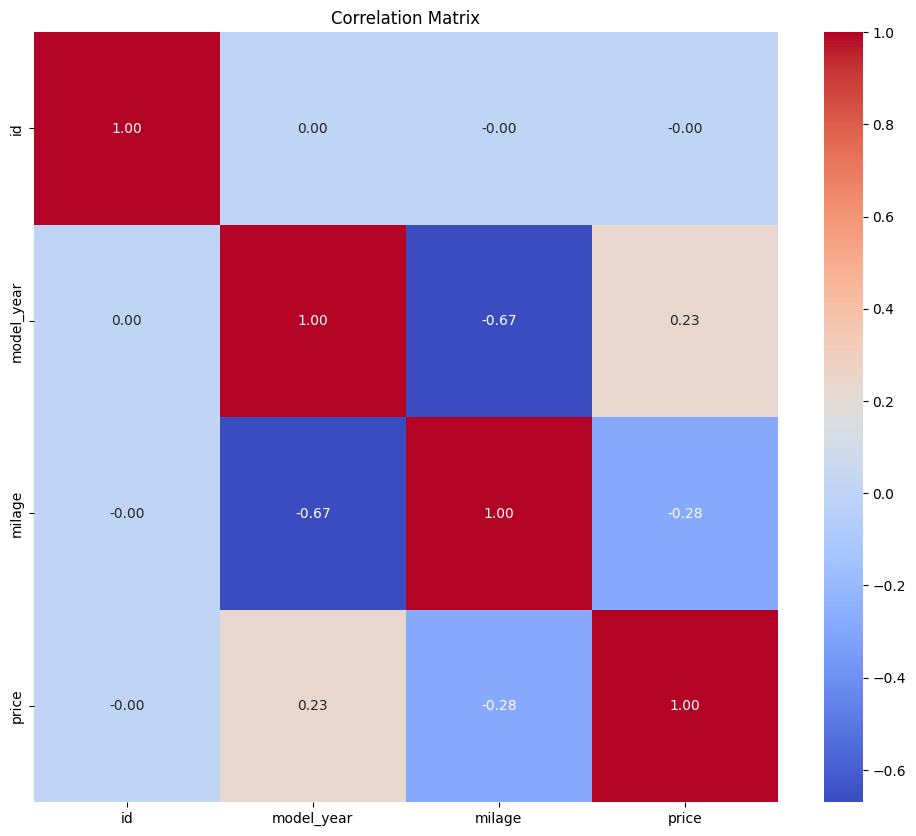

In [41]:
# prompt: Can you show me the column with high correlation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Load your data if not already loaded
# data = pd.read_csv("train.csv")

# Calculate the correlation matrix
correlation_matrix = data.select_dtypes(include=[float, int]).corr()

# Find columns with high correlation (e.g., correlation > 0.7)
high_correlation_columns = correlation_matrix[
    (correlation_matrix > 0.7) & (correlation_matrix != 1.0)
].stack().sort_values(ascending=False)

# Print the columns with high correlation
print("Columns with High Correlation:")
print(high_correlation_columns)

# You can also visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
!pip install pingouin

In [ ]:
import pandas as pd
import numpy as np
import pingouin  # Install using:

from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

def binary_correlation(df):
    """
    Computes the correlation matrix for a DataFrame with binary and numerical features.

    Args:
    df: The pandas DataFrame.

    Returns:
    The correlation matrix as a pandas DataFrame.
    """

    num_cols = df.select_dtypes(include=np.number).columns
    bin_cols = df.select_dtypes(include=['bool', 'object']).columns


    corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

    # Fill diagonal with 1s
    np.fill_diagonal(corr_matrix.values, 1)

    # Calculate correlations
    for i in range(len(df.columns)):
        for j in range(i + 1, len(df.columns)):
            col1 = df.columns[i]
            col2 = df.columns[j]

            if col1 in bin_cols and col2 in bin_cols:
                # Phi coefficient for binary-binary
                contingency_table = pd.crosstab(df[col1], df[col2])
                phi = np.sqrt(chi2_contingency(contingency_table)[0] / len(df))
                corr_matrix.loc[col1, col2] = corr_matrix.loc[col2, col1] = phi
                phi = pingouin.phi(df[[col1, col2]], x=col1, y=col2)  # Assuming pingouin is installed
                corr_matrix.loc[col1, col2] = corr_matrix.loc[col2, col1] = phi.phi.values[0]

            if (col1 in bin_cols and col2 in num_cols) or (col1 in num_cols and col2 in bin_cols):
                # Point-biserial correlation for binary-numerical
                if col1 in bin_cols:
                    binary_col, num_col = col1, col2
                else:
                    binary_col, num_col = col2, col1

                # Assuming binary_col is encoded as 0/1, may need adjustment
                correlation, _ = pointbiserialr(df[binary_col], df[num_col])
                # correlation = pingouin.pbcorr(df[num_col], df[binary_col]).r.values[0]  # Assuming pingouin is installed
                corr_matrix.loc[col1, col2] = corr_matrix.loc[col2, col1] = correlation

            else:
                # Pearson correlation for numerical-numerical (already handled by .corr())
                corr_matrix.loc[col1, col2] = corr_matrix.loc[col2, col1] = df[col1].corr(df[col2])

    return corr_matrix

data_correlation = binary_correlation(data)

In [50]:
# prompt: how to show corr_matrix pair that have value more than 0.7

# Assuming 'data' is your DataFrame and 'correlation_matrix' is calculated as before
# Find pairs with correlation greater than 0.7

high_correlation_pairs = correlation_matrix[
    (correlation_matrix > 0.7) & (correlation_matrix != 1.0)
]

# Print the pairs with high correlation
print("Pairs with High Correlation:")
print(high_correlation_pairs)

Pairs with High Correlation:
            id  model_year  milage  price
id         NaN         NaN     NaN    NaN
model_year NaN         NaN     NaN    NaN
milage     NaN         NaN     NaN    NaN
price      NaN         NaN     NaN    NaN


#### Distribution Plot

#### Box Plot

## Data Preprocessing

### Pengelompokan Data Berdasarkan Jenis Kelamin

In [ ]:
import pandas as pd

# assume 'data' is your DataFrame
data_grouped = data.groupby('Jenis Kelamin')

# now you can apply various operations to each group
for name, group in data_grouped:
    # Sum of repeated / duplicated values in dataframe
    print(name)

### Splitting Data
<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:388/1*QSXxOderidihfo1itIE7cw.png" width="500" height="300"/>
</div>

* Dilakukan pemisahan data untuk menghindari adanya 'Data Leakage'

In [ ]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y) variables
X = data.drop('Umur Kerang', axis=1)  # Replace 'target_column' with your actual target column name
y = data['Umur Kerang']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Data validasi tidak disentuh sama sekali (kecuali encoding) agar data lebih murni menirukan data sebenarnya di lapangan.

### Pembersihan Data

#### Mengatasi Data yang Terduplikat

In [ ]:
# Drop Duplicates
# Store the original indices before dropping duplicates
original_indices = X_train.index

# Drop duplicates
X_train_deduped = X_train.drop_duplicates()

# Identify the indices that were dropped
dropped_duplicates_indices = original_indices.difference(X_train_deduped.index)

# Display the indices of dropped duplicates
print("Indices of dropped duplicates:", dropped_duplicates_indices.tolist())

# Drop the corresponding rows in y_train
y_train_deduped = y_train[X_train_deduped.index]

# Update X_train to the deduplicated version
X_train = X_train_deduped


In [ ]:
# Sum of missing values in each column
X_train.isnull().sum()

In [ ]:
y_train.isnull().sum()

#### Mengatasi 'Missing Values'
* 'Missing Values' adalah data yang hilang atau tidak terdefinisikan
* Direpresentasikan dengan NaN

In [ ]:
# Copy DataFrame
data_grouped = data.groupby('Jenis Kelamin')

In [ ]:
# Columns with missing values
columns_to_impute = ['Panjang', 'Diameter Cangkang', 'Tinggi',
       'Berat Daging Belum Dikupas', 'Berat Daging Udah Dikupas',
       'Berat Organ Dalam', 'Berat Cangkang']

# Impute missing values with the median value for each group
for column in columns_to_impute:
    for group in data_grouped:
        X_train[column] = X_train.groupby('Jenis Kelamin')[column].transform(lambda x: x.fillna(x.median()))

X_train = X_train.reset_index(drop=True)

# Check if there are any missing values left
X_train.isnull().sum()

In [ ]:
# Check if there are any missing values left
X_train.isnull().sum()

### Mengubah Kolom Kategori (Non-Angka) Menjadi Angka

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder to the 'Jenis Kelamin' column and transform it
X_train['Jenis Kelamin'] = le.fit_transform(X_train['Jenis Kelamin'])

In [ ]:
X_val['Jenis Kelamin'] = le.fit_transform(X_val['Jenis Kelamin'])

### Analisis Korelasi Antara Tiap Kolom

In [ ]:
# Compute the correlation matrix
merged = pd.concat([X_train, y_train], axis=1)
correlation_matrix = merged.corr()

# Display the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Analisis Data 'Outlier'
* Data outlier adalah data yang memiliki nilai abnormal dibandingkan dengan data-data yang lain (seperti terlalu tinggi atau terlalu rendah).
* Jika dibiarkan, model akan rentan untuk menjadi bias karena adanya outlier yang 'menyamarkan' pola sesungguhnya data.  

#### Menghapus Outlier


In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Store the original indices
original_indices = X_train.index

# Create a combined mask for all columns
combined_mask = pd.Series(True, index=X_train.index)

# Loop through each numeric column to update the combined mask
for column in X_train.select_dtypes(include=['number']).columns:
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Update the combined mask
    combined_mask &= (X_train[column] >= lower_bound) & (X_train[column] <= upper_bound)

# Apply the combined mask to X_train
X_train = X_train[combined_mask]

# Ensure that y_train is indexed by the same indices as X_train
y_train = y_train.loc[X_train.index]


#### Mengatasi 'Missing Values'
* 'Missing Values' adalah data yang hilang atau tidak terdefinisikan
* Direpresentasikan dengan NaN

In [ ]:
# Drop rows with null values in X_val
null_indices = X_val[X_val.isnull().any(axis=1)].index

# Drop the corresponding rows in both X_val and y_val
X_val = X_val.dropna()
y_val = y_val.drop(null_indices)

#### Mengubah Bentuk Data (Data Transformation)

In [ ]:
import numpy as np

# Columns to apply log transformation
columns = ['Panjang', 'Diameter Cangkang', 'Tinggi',
       'Berat Daging Belum Dikupas', 'Berat Daging Udah Dikupas',
       'Berat Organ Dalam', 'Berat Cangkang']
# Apply log transformation, adding 1 to avoid issues with zero values
X_train[columns] = np.log1p(X_train[columns])
X_val[columns] = np.log1p(X_val[columns])

# Check the transformed data
X_train.head()

In [ ]:
# Calculate the number of rows and columns for the subplot grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(X_train.columns) + n_cols - 1) // n_cols  # Calculate rows needed, rounding up

# Create a figure and a grid of subplots
plt.figure(figsize=(5 * n_cols, 6 * n_rows))

for i, column in enumerate(X_train.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(X_train[column], kde=True)
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Tahap Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Create a PolynomialFeatures object
poly_features = PolynomialFeatures(degree=2)

# Transform your data
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)

# Train a LinearRegression model on the transformed data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

mse = mean_squared_error(y_val.values, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {np.sqrt(mse):.2f}')

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_train, X_val, y_train, and y_val are already defined

# Create a PolynomialFeatures object
poly_features = PolynomialFeatures(degree=5)

# Transform your data
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)

# Initialize the MLPRegressor model (Neural Network)
# You can adjust the hidden_layer_sizes, activation, solver, etc., according to your needs
model = MLPRegressor(hidden_layer_sizes=(1000,), activation='logistic', solver='adam', max_iter=1000, random_state=42)

# Train the model on the transformed data
model.fit(X_train_poly, y_train)

# Predict on the validation set
y_pred = model.predict(X_val_poly)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {np.sqrt(mse):.2f}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, mean_squared_error

# Define the range of training sizes
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error', random_state=42
)

# Calculate the mean and standard deviation for training and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, val_mean, label='Validation score', color='green')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.2)

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

train_sizes = np.linspace(0.1, 0.9, 10)
scores = []
for train_size in train_sizes:
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
    scores.append(cross_val_score(model, X_train_subset, y_train_subset, cv=5, scoring='neg_mean_squared_error'))

scores = np.array(scores)
train_mean = -np.mean(scores, axis=1)
train_std = np.std(scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)